In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_encoder import FrequencyEncoder,FurnishingEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OneHotEncoder, StandardScaler ,OrdinalEncoder ,FunctionTransformer
from sklearn.compose import ColumnTransformer

In [109]:
data=pd.read_csv("house_prices_bangalore.csv")
data.head(10)

,area,location,bhk,bath,balcony,parking,furnishing,property_type,age,price
0,2065,Bannerghatta Road,2,3,0,1,Semi-Furnished,Independent House,3,17280000
1,1539,Yelahanka,3,1,0,1,Unfurnished,Villa,8,9410000
2,2048,Bannerghatta Road,3,1,2,0,Semi-Furnished,Independent House,10,20300000
3,1233,Sarjapur Road,3,2,1,2,Fully-Furnished,Apartment,12,9060000
4,2487,Yelahanka,3,3,2,1,Fully-Furnished,Villa,4,28660000
5,1618,Yelahanka,2,3,1,1,Unfurnished,Apartment,1,10320000
6,2407,Whitefield,1,1,1,2,Unfurnished,Independent House,13,20820000
7,1672,Banashankari,2,2,1,0,Unfurnished,Apartment,11,11420000
8,1506,Sarjapur Road,5,2,1,1,Semi-Furnished,Villa,4,7540000
9,847,Sarjapur Road,2,2,2,1,Semi-Furnished,Villa,6,4240000


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   area           1000 non-null   int64 
 1   location       1000 non-null   object
 2   bhk            1000 non-null   int64 
 3   bath           1000 non-null   int64 
 4   balcony        1000 non-null   int64 
 5   parking        1000 non-null   int64 
 6   furnishing     1000 non-null   object
 7   property_type  1000 non-null   object
 8   age            1000 non-null   int64 
 9   price          1000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 78.3+ KB


In [111]:
data.describe()

,area,bhk,bath,balcony,parking,age,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1648.51100,3.082000,2.557000,1.012000,0.965000,8.040000,1.237301e+07
std,487.90919,1.364235,1.415187,0.802808,0.834549,4.338805,5.386504e+06
min,803.00000,1.000000,1.000000,0.000000,0.000000,1.000000,2.850000e+06
25%,1226.75000,2.000000,1.000000,0.000000,0.000000,4.000000,8.405000e+06
50%,1648.00000,3.000000,2.000000,1.000000,1.000000,8.000000,1.132000e+07
75%,2075.25000,4.000000,3.000000,2.000000,2.000000,12.000000,1.543000e+07
max,2499.00000,5.000000,6.000000,2.000000,2.000000,15.000000,3.273000e+07


In [112]:
data.isnull().sum()

area             0
location         0
bhk              0
bath             0
balcony          0
parking          0
furnishing       0
property_type    0
age              0
price            0
dtype: int64

In [113]:
for column in data.columns:
  if (column == 'area') or (column == 'price')   :
    continue
  else:
    print(data[column].value_counts())

location
Banashankari         68
Yelahanka            65
BTM Layout           61
Sarjapur Road        58
HSR Layout           57
Malleshwaram         56
Bellandur            55
Bannerghatta Road    53
Koramangala          51
Rajajinagar          49
Jayanagar            47
Whitefield           47
Marathahalli         46
KR Puram             46
Hebbal               45
Electronic City      44
Uttarahalli          43
Indiranagar          40
JP Nagar             36
Kengeri              33
Name: count, dtype: int64
bhk
3    229
2    205
5    204
4    201
1    161
Name: count, dtype: int64
bath
1    293
2    251
3    211
4    137
5     67
6     41
Name: count, dtype: int64
balcony
1    356
2    328
0    316
Name: count, dtype: int64
parking
0    366
2    331
1    303
Name: count, dtype: int64
furnishing
Fully-Furnished    344
Semi-Furnished     337
Unfurnished        319
Name: count, dtype: int64
property_type
Apartment            341
Villa                331
Independent House    328
Name: co

In [114]:
data.nunique()

area             755
location          20
bhk                5
bath               6
balcony            3
parking            3
furnishing         3
property_type      3
age               15
price            764
dtype: int64

In [115]:
data.corr(numeric_only=True)

,area,bhk,bath,balcony,parking,age,price
area,1.000000,-0.001792,0.045052,-0.010368,-0.069223,-0.012238,0.691944
bhk,-0.001792,1.000000,0.529018,0.011896,0.046484,0.015680,0.026026
bath,0.045052,0.529018,1.000000,0.041689,0.033474,0.005660,0.050284
balcony,-0.010368,0.011896,0.041689,1.000000,0.048438,-0.003012,0.019906
parking,-0.069223,0.046484,0.033474,0.048438,1.000000,-0.053244,-0.037141
age,-0.012238,0.015680,0.005660,-0.003012,-0.053244,1.000000,-0.008301
price,0.691944,0.026026,0.050284,0.019906,-0.037141,-0.008301,1.000000


C:\Users\madev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\madev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\madev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\madev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

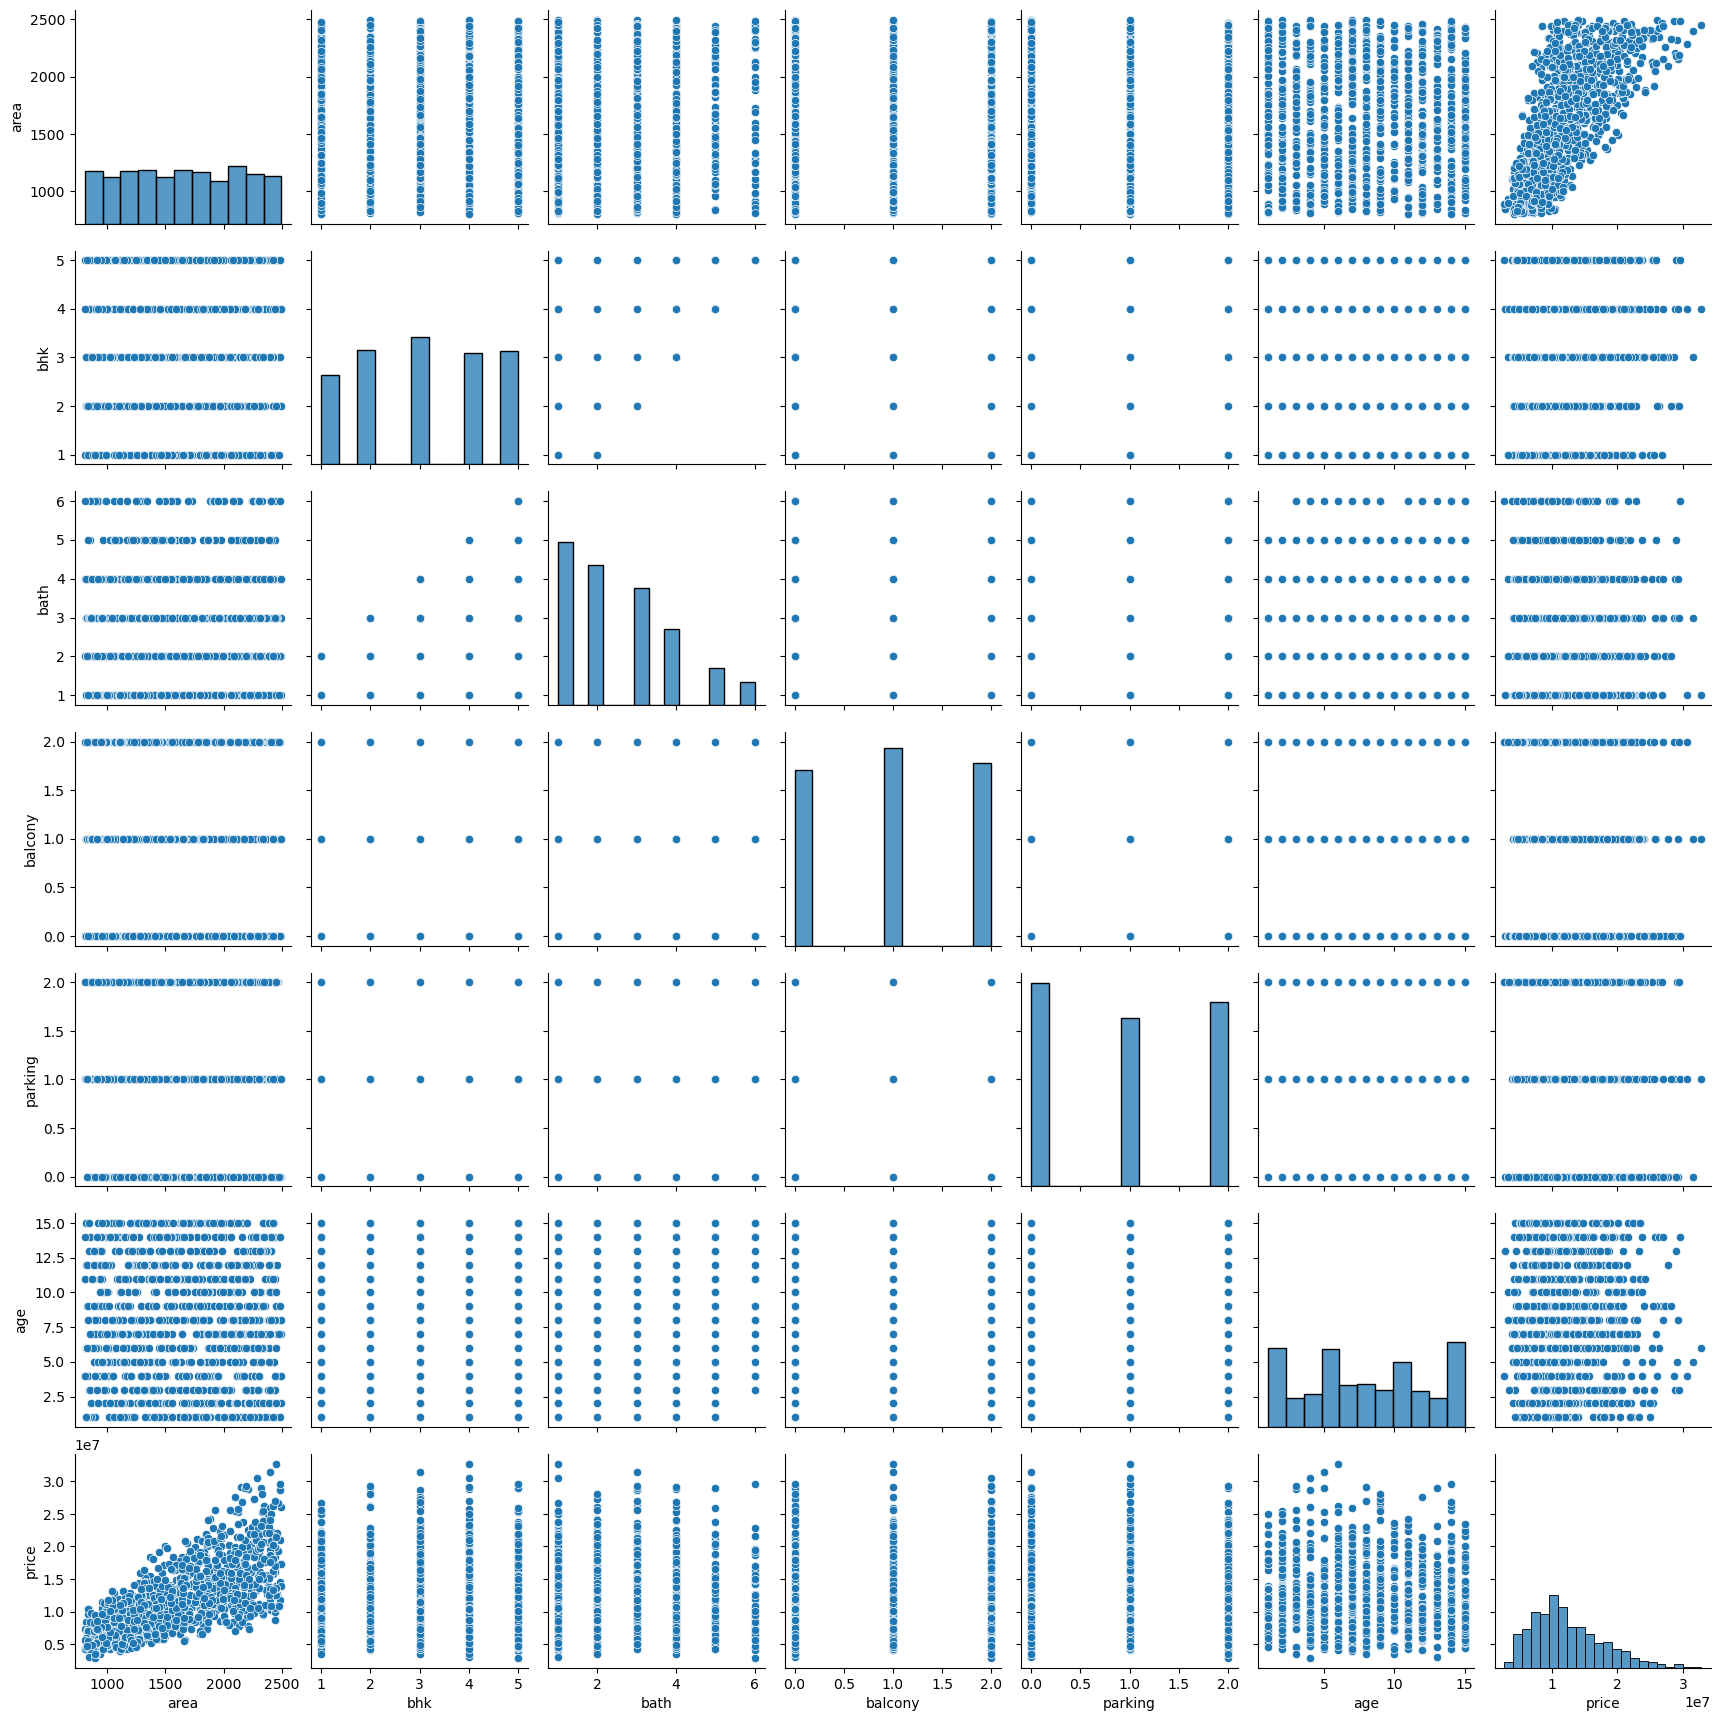

In [116]:
sns.pairplot(data)

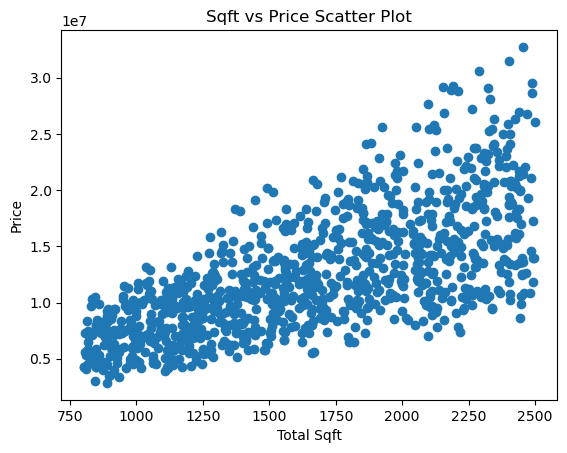

In [117]:
plt.scatter(data["area"], data["price"])
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.title("Sqft vs Price Scatter Plot")
plt.show()

In [118]:
data.corr(numeric_only=True)['price'].sort_values(ascending=False)

price      1.000000
area       0.691944
bath       0.050284
bhk        0.026026
balcony    0.019906
age       -0.008301
parking   -0.037141
Name: price, dtype: float64

In [119]:
pivot_table1= pd.pivot_table(data,index = ['location'] , values = ['price'],aggfunc="mean")
print(data['location'].value_counts())
pivot_table1

location
Banashankari         68
Yelahanka            65
BTM Layout           61
Sarjapur Road        58
HSR Layout           57
Malleshwaram         56
Bellandur            55
Bannerghatta Road    53
Koramangala          51
Rajajinagar          49
Jayanagar            47
Whitefield           47
Marathahalli         46
KR Puram             46
Hebbal               45
Electronic City      44
Uttarahalli          43
Indiranagar          40
JP Nagar             36
Kengeri              33
Name: count, dtype: int64


,price
location,
BTM Layout,1.264672e+07
Banashankari,1.272956e+07
Bannerghatta Road,1.201887e+07
Bellandur,1.175564e+07
Electronic City,1.285636e+07
HSR Layout,1.182035e+07
Hebbal,1.206778e+07
Indiranagar,1.279200e+07
JP Nagar,1.545639e+07


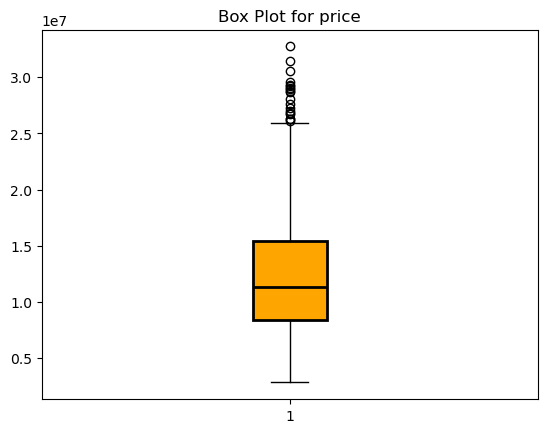

In [120]:
plt.boxplot(x = data['price'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for price')
plt.show()

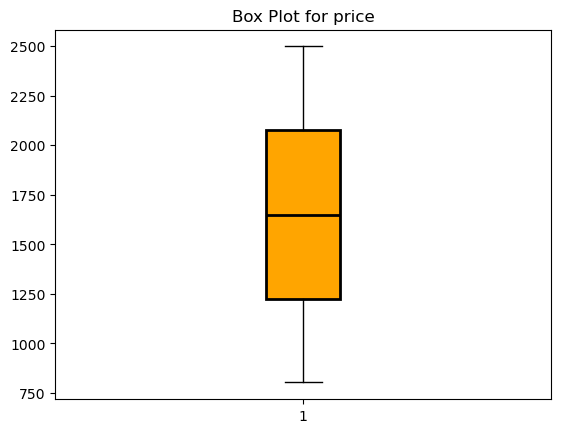

In [121]:
plt.boxplot(x = data['area'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for price')
plt.show()

In [122]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
y = data['price']

preprocess = ColumnTransformer(
    transformers=[
        ("location_ohe", OneHotEncoder(handle_unknown="ignore"), ["location"]),
        ("property_freq", FrequencyEncoder("property_type"), ["property_type"]),
        ("furnishing_lbl", FurnishingEncoder("furnishing"), ["furnishing"])
    ],
    remainder='passthrough'   # keep numeric columns automatically
)

model = Pipeline(steps=[
    ("prep", preprocess),
    ("rf", RandomForestRegressor(n_estimators=300, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

print("Training complete!")
print("R² score:", model.score(X_test, y_test))


Training complete!
R² score: 0.605227865204453


In [123]:
new_house = pd.DataFrame([{
    "area":2407,
    "location": "Whitefield",
    "bhk": 1,
    "bath": 1,
    "balcony": 1,
    "parking":2,
    "furnishing": "Unfurnished",
    "property_type": "Independent House",
    "age":13
    
}])

prediction = model.predict(new_house)
print("Predicted price:", prediction[0])

Predicted price: 18916233.333333332


In [124]:
import joblib

joblib.dump(model, "house_price_model.pkl")

print("Model saved!")


Model saved!


In [125]:
import os
os.getcwd()


'C:\\Users\\madev\\mca 3rd sem project'